In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df2 = df.copy()

In [4]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df2.shape

(21613, 21)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
df2['date'].unique()

array(['20141013T000000', '20141209T000000', '20150225T000000',
       '20150218T000000', '20140512T000000', '20140627T000000',
       '20150115T000000', '20150415T000000', '20150312T000000',
       '20150403T000000', '20140527T000000', '20140528T000000',
       '20141007T000000', '20150124T000000', '20140731T000000',
       '20140529T000000', '20141205T000000', '20150424T000000',
       '20140514T000000', '20140826T000000', '20140703T000000',
       '20140516T000000', '20141120T000000', '20141103T000000',
       '20140626T000000', '20141201T000000', '20140624T000000',
       '20150302T000000', '20141110T000000', '20141203T000000',
       '20140613T000000', '20141230T000000', '20150213T000000',
       '20140620T000000', '20140715T000000', '20140811T000000',
       '20140707T000000', '20141028T000000', '20140729T000000',
       '20140718T000000', '20150325T000000', '20140716T000000',
       '20150428T000000', '20150311T000000', '20140916T000000',
       '20150217T000000', '20141231T0000

In [9]:
df2['date'] = df2['date'].str.slice(0,8)
df2['date_sold'] = pd.to_datetime(df2['date'])

df2['bathrooms'] = df2['bathrooms'].apply(np.ceil)
df2['bathrooms'] = df2['bathrooms'].astype('uint8')

df2['floors'] = df2['floors'].apply(np.ceil)
df2['floors'] = df2['floors'].astype('uint8')

# Extract the year, month, and day from the datetime object
df2['year_sold'] = df2['date_sold'].dt.year
df2['month_sold'] = df2['date_sold'].dt.month
df2['day_sold'] = df2['date_sold'].dt.day

#dict_1 = {0:'False', 1:'True'}
# df2['waterfront'] = df2['waterfront'].replace(dict_1).astype('category')

# df2['yr_built'] = df2['yr_built'].astype('category')

# df2['zipcode'] = df2['zipcode'].astype('category')

# df2['view'] = df2['view'].astype('category')

# df2['condition'] = df2['condition'].astype('category')

# df2['grade'] = df2['grade'].astype('category')

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  object        
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  uint8         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  uint8         
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [11]:
df3 = df2.drop(columns=['id','date','date_sold'])

In [12]:
df3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'month_sold', 'day_sold'],
      dtype='object')

In [13]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
0,221900.0,3,1,1180,5650,1,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,3,2570,7242,2,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1,770,10000,1,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3,1960,5000,1,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2,1680,8080,1,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [14]:
df3[['bedrooms','bathrooms']]

,bedrooms,bathrooms
0,3,1
1,3,3
2,2,1
3,4,3
4,3,2
...,...,...
21608,3,3
21609,4,3
21610,2,1
21611,3,3


The "House Sales in King County, USA" dataset is a well-known dataset used for various data analysis and machine learning tasks. It contains information about real estate house sales in King County, Washington, USA. Below is a brief data description of the key features in this dataset:

1. **id**: A unique identifier for each house sale.

2. **date**: The date when the house was sold.

3. **price**: The price at which the house was sold. This is typically the target variable in regression tasks.

4. **bedrooms**: The number of bedrooms in the house.

5. **bathrooms**: The number of bathrooms in the house. This may include both full and half bathrooms.

6. **sqft_living**: The total living space area in square feet.

7. **sqft_lot**: The total land area in square feet.

8. **floors**: The number of floors (levels) in the house.

9. **waterfront**: A binary variable indicating whether the house has a view of the waterfront (0 for no, 1 for yes).

10. **view**: A rating of the view from the property.

11. **condition**: An overall condition rating of the house.

12. **grade**: An overall grade given to the housing unit based on King County grading system.

13. **sqft_above**: The square footage of the house above ground level.

14. **sqft_basement**: The square footage of the house's basement.

15. **yr_built**: The year the house was built.

16. **yr_renovated**: The year the house was renovated. If no renovation has occurred, the value is typically set to 0.

17. **zipcode**: The ZIP code area in King County where the house is located.

18. **lat**: The latitude coordinate of the house.

19. **long**: The longitude coordinate of the house.

20. **sqft_living15**: The average square footage of the 15 nearest houses.

21. **sqft_lot15**: The average land area of the 15 nearest houses.

# Visualizations

<AxesSubplot:xlabel='price', ylabel='Density'>

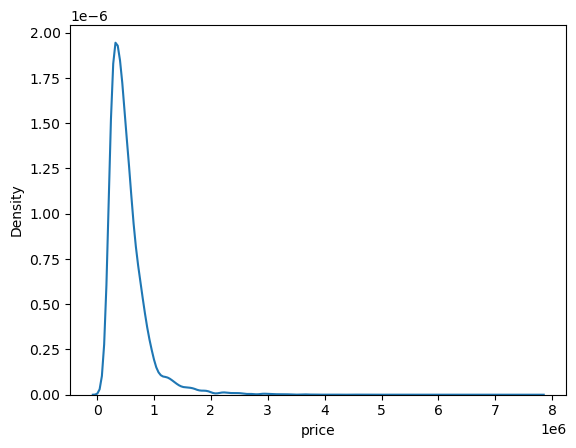

In [15]:
sns.kdeplot(data=df3, x='price')

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

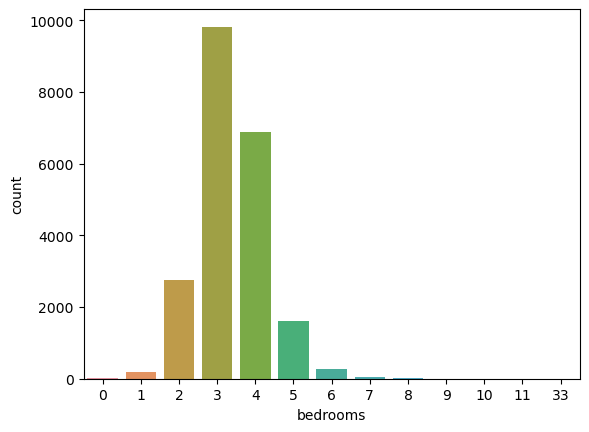

In [16]:
# width =0.8
sns.countplot(data= df3, x='bedrooms')

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

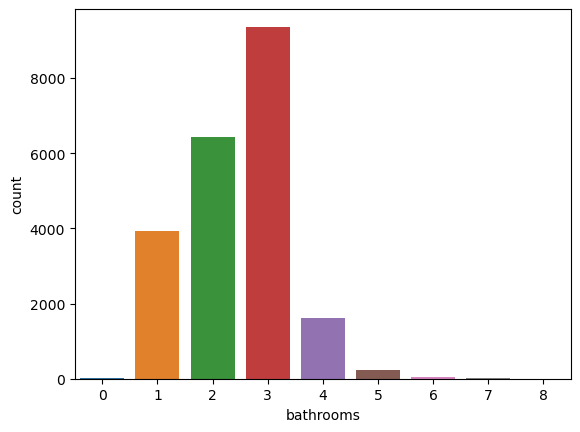

In [17]:
sns.countplot(data=df3,x='bathrooms')

In [18]:
dfBed_out = df3[(df3['bedrooms'] <1) & (df3['bathrooms'] < 1)]

In [19]:
# outlier
dfBed_out

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
875,1095000.0,0,0,3064,4764,4,0,2,3,7,...,1990,0,98102,47.6362,-122.322,2360,4000,2014,6,12
3119,380000.0,0,0,1470,979,3,0,2,3,8,...,2006,0,98133,47.7145,-122.356,1470,1399,2015,2,5
6994,1295650.0,0,0,4810,28008,2,0,0,3,12,...,1990,0,98053,47.6642,-122.069,4740,35061,2014,6,24
9773,355000.0,0,0,2460,8049,2,0,0,3,8,...,1990,0,98031,47.4095,-122.168,2520,8050,2015,4,29
9854,235000.0,0,0,1470,4800,2,0,0,3,7,...,1996,0,98065,47.5265,-121.828,1060,7200,2014,12,23
14423,139950.0,0,0,844,4269,1,0,0,4,7,...,1913,0,98001,47.2781,-122.250,1380,9600,2015,4,13
19452,142000.0,0,0,290,20875,1,0,0,1,1,...,1963,0,98024,47.5308,-121.888,1620,22850,2014,9,26


In [20]:
# Filter out rows where 'bedrooms' or 'bathroom' is less than 1
df4 = df3[(df3['bedrooms'] >=1) & (df3['bathrooms'] >= 1)]

In [21]:
# Now, df3 will contain the rows where 'bedrooms' is within the range of 1 to 20.
df4.shape

(21597, 22)

In [22]:
 df4[df4['bedrooms']<1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold


In [23]:
df4[df4['bathrooms']<1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold


In [24]:
df5 = df4[df4['bedrooms']<=20]

In [25]:
df5.shape

(21596, 22)

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

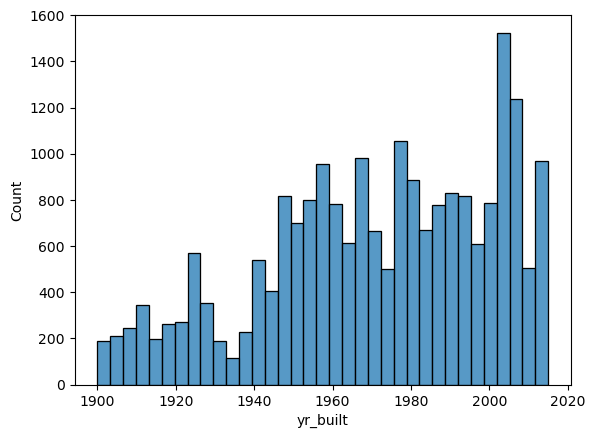

In [26]:
sns.histplot(data=df5, x='yr_built')

In [27]:
df5.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'month_sold', 'day_sold'],
      dtype='object')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

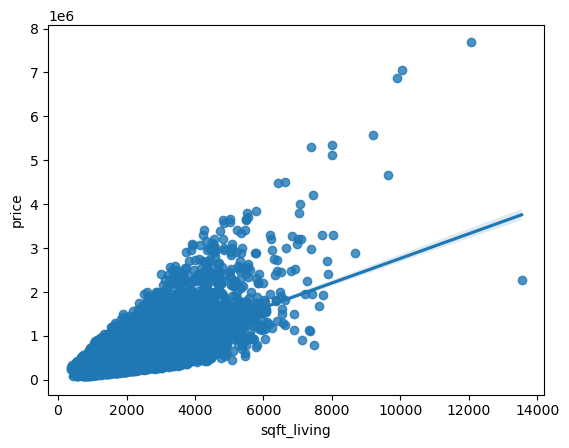

In [28]:
sns.regplot(data=df5, x='sqft_living', y='price')

In [29]:
# removing outlier
df6 = df5[~((df5['sqft_living']>12_000)& (df5['price']<3_000_000))]
df6.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
0,221900.0,3,1,1180,5650,1,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,3,2570,7242,2,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1,770,10000,1,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3,1960,5000,1,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2,1680,8080,1,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [30]:
df6['waterfront'].value_counts()

0    21432
1      163
Name: waterfront, dtype: int64

<AxesSubplot:xlabel='waterfront', ylabel='price'>

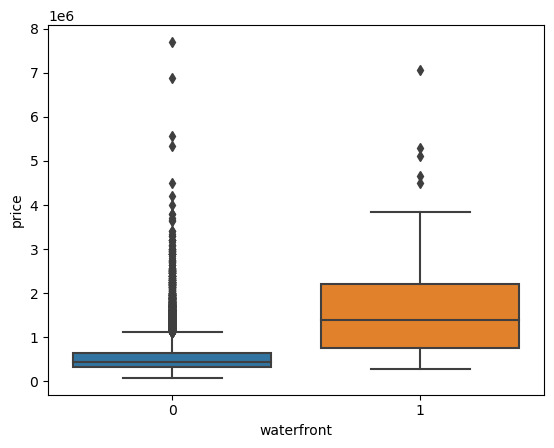

In [31]:
sns.boxplot(data=df6, x='waterfront', y='price')

<AxesSubplot:xlabel='condition', ylabel='price'>

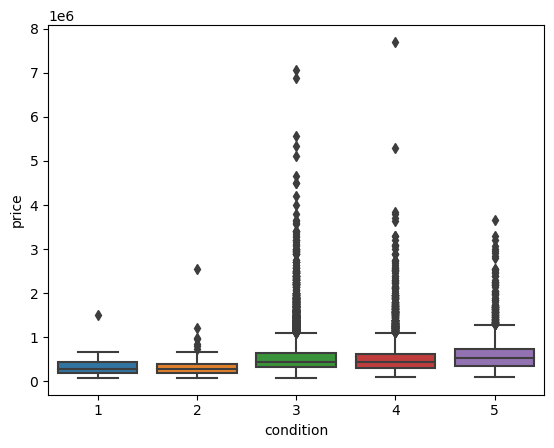

In [32]:
sns.boxplot(data=df6, x='condition', y='price')

<AxesSubplot:xlabel='grade', ylabel='price'>

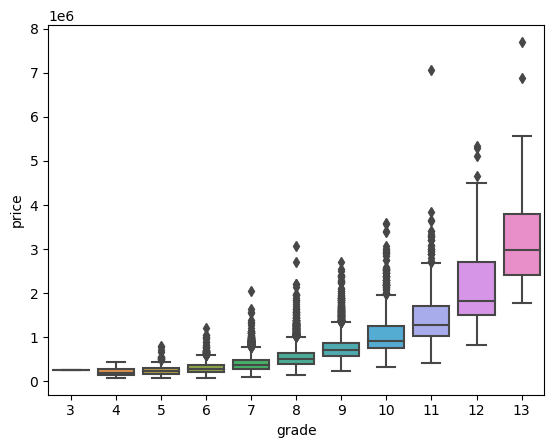

In [33]:
sns.boxplot(data=df6, x='grade', y='price')

In [34]:
df6['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [35]:
# sns.boxplot(data=df4.head(), x='yr_built', y='price')

In [36]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21595 non-null  float64
 1   bedrooms       21595 non-null  int64  
 2   bathrooms      21595 non-null  uint8  
 3   sqft_living    21595 non-null  int64  
 4   sqft_lot       21595 non-null  int64  
 5   floors         21595 non-null  uint8  
 6   waterfront     21595 non-null  int64  
 7   view           21595 non-null  int64  
 8   condition      21595 non-null  int64  
 9   grade          21595 non-null  int64  
 10  sqft_above     21595 non-null  int64  
 11  sqft_basement  21595 non-null  int64  
 12  yr_built       21595 non-null  int64  
 13  yr_renovated   21595 non-null  int64  
 14  zipcode        21595 non-null  int64  
 15  lat            21595 non-null  float64
 16  long           21595 non-null  float64
 17  sqft_living15  21595 non-null  int64  
 18  sqft_l

<AxesSubplot:xlabel='floors', ylabel='count'>

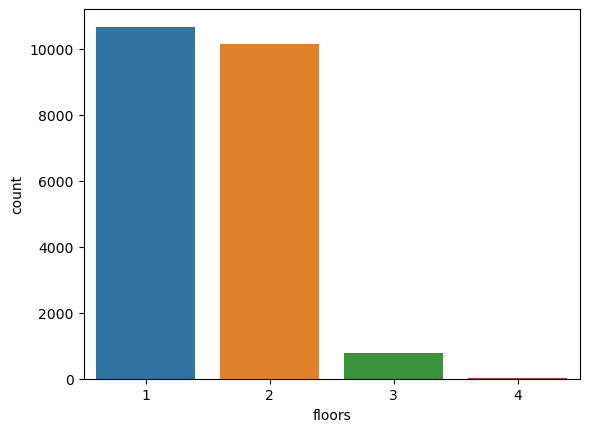

In [37]:
sns.countplot(data=df6, x='floors')

In [38]:
df6[['floors']].value_counts()

floors
1         10672
2         10145
3           771
4             7
dtype: int64

In [39]:
df6.duplicated().sum()

0

# feature selection

In [40]:
df6.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702083
grade            0.667682
sqft_above       0.604877
sqft_living15    0.584896
bathrooms        0.491877
view             0.396673
sqft_basement    0.322599
bedrooms         0.315367
lat              0.306766
waterfront       0.266596
floors           0.257587
yr_renovated     0.126530
sqft_lot         0.088482
sqft_lot15       0.081340
yr_built         0.053815
condition        0.036157
long             0.021760
year_sold        0.003911
month_sold      -0.009848
day_sold        -0.014435
zipcode         -0.053369
Name: price, dtype: float64

(22.5, -0.5)

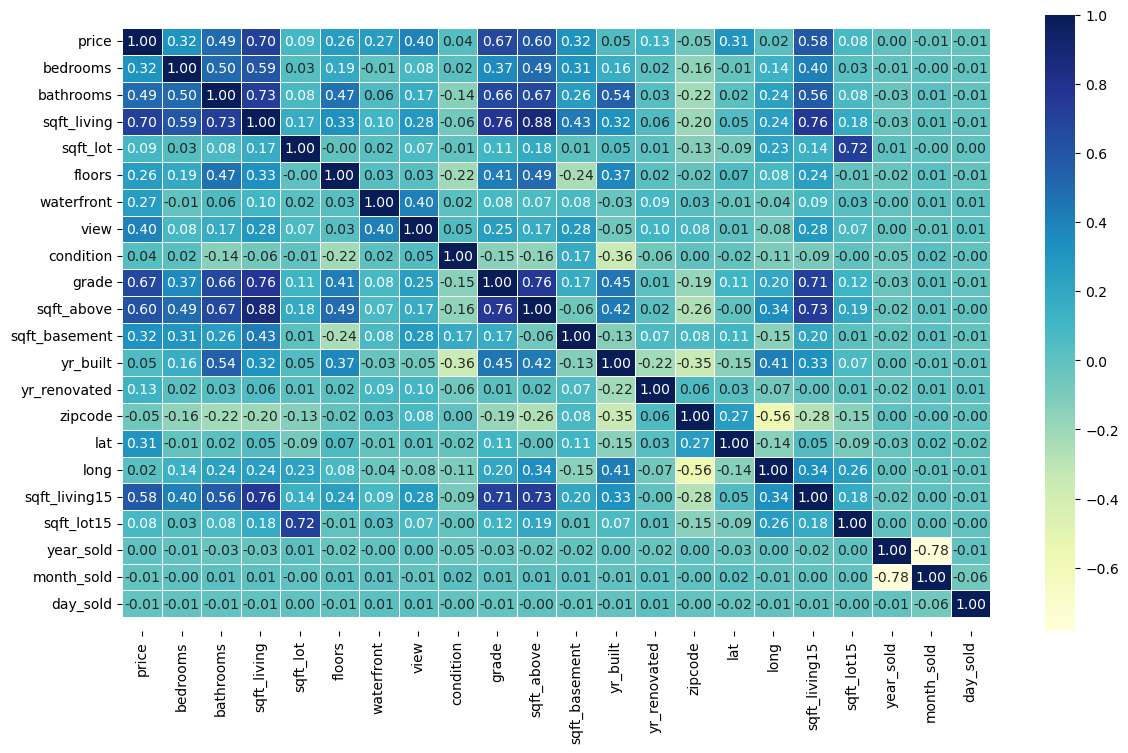

In [41]:
corr_matrix = df6.corr()
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.heatmap(corr_matrix,
 annot=True,
linewidths=0.5,
fmt=".2f",
cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [42]:
df6.skew()

price             4.027588
bedrooms          0.549548
bathrooms         0.105970
sqft_living       1.399901
sqft_lot         13.102072
floors            0.448392
waterfront       11.380257
view              3.396943
condition         1.036035
grade             0.787063
sqft_above        1.420845
sqft_basement     1.556072
yr_built         -0.469476
yr_renovated      4.547332
zipcode           0.405316
lat              -0.485370
long              0.884990
sqft_living15     1.105344
sqft_lot15        9.542743
year_sold         0.757115
month_sold        0.063328
day_sold         -0.005486
dtype: float64

In [43]:
X = df6.copy()
y= X.pop('price')

for col_name in X.select_dtypes(['object','category']):
    X[col_name],_ = X[col_name].factorize()

In [44]:
# calculating the mutual info of features in the DataFrame in relation to the 'SalePrice'
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index= X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[::3]  # show a few features with their MI scores

zipcode         0.421292
lat             0.341627
bathrooms       0.181176
sqft_lot15      0.082166
floors          0.065028
yr_renovated    0.013922
year_sold       0.000000
Name: MI Scores, dtype: float64

In [45]:
mi_scores

zipcode          0.421292
sqft_living      0.353609
grade            0.347959
lat              0.341627
sqft_living15    0.269218
sqft_above       0.262256
bathrooms        0.181176
long             0.114874
bedrooms         0.084423
sqft_lot15       0.082166
yr_built         0.075859
sqft_basement    0.065822
floors           0.065028
sqft_lot         0.060857
view             0.059017
yr_renovated     0.013922
condition        0.013473
waterfront       0.012326
year_sold        0.000000
month_sold       0.000000
day_sold         0.000000
Name: MI Scores, dtype: float64

id: A unique identifier for each house sale.

date: The date when the house was sold.

price: The price at which the house was sold. This is typically the target variable in regression tasks.

bedrooms: The number of bedrooms in the house.

bathrooms: The number of bathrooms in the house. This may include both full and half bathrooms.

sqft_living: The total living space area in square feet.

sqft_lot: The total land area in square feet.

floors: The number of floors (levels) in the house.

waterfront: A binary variable indicating whether the house has a view of the waterfront (0 for no, 1 for yes).

view: A rating of the view from the property.

condition: An overall condition rating of the house.

grade: An overall grade given to the housing unit based on King County grading system.

sqft_above: The square footage of the house above ground level.

sqft_basement: The square footage of the house's basement.

yr_built: The year the house was built.

yr_renovated: The year the house was renovated. If no renovation has occurred, the value is typically set to 0.

zipcode: The ZIP code area in King County where the house is located.

lat: The latitude coordinate of the house.

long: The longitude coordinate of the house.

sqft_living15: The average square footage of the 15 nearest houses.

sqft_lot15: The average land area of the 15 nearest houses.



In [46]:
features = ['zipcode','sqft_living','grade','lat','sqft_above','bathrooms','long','bedrooms','yr_built',
            'sqft_basement','floors','sqft_lot','view','condition','waterfront','price']

# 'yr_renovated','year_sold','month_sold','sqft_living15','sqft_lot15'
df7 = df6[features]

In [47]:
df7.head()

,zipcode,sqft_living,grade,lat,sqft_above,bathrooms,long,bedrooms,yr_built,sqft_basement,floors,sqft_lot,view,condition,waterfront,price
0,98178,1180,7,47.5112,1180,1,-122.257,3,1955,0,1,5650,0,3,0,221900.0
1,98125,2570,7,47.7210,2170,3,-122.319,3,1951,400,2,7242,0,3,0,538000.0
2,98028,770,6,47.7379,770,1,-122.233,2,1933,0,1,10000,0,3,0,180000.0
3,98136,1960,7,47.5208,1050,3,-122.393,4,1965,910,1,5000,0,5,0,604000.0
4,98074,1680,8,47.6168,1680,2,-122.045,3,1987,0,1,8080,0,3,0,510000.0


In [48]:
df7.describe().T

,count,mean,std,min,25%,50%,75%,max
zipcode,21595.0,98077.951841,53.515010,98001.0000,98033.0000,98065.0000,98118.000,9.819900e+04
sqft_living,21595.0,2079.812503,914.825306,370.0000,1430.0000,1910.0000,2550.000,1.205000e+04
grade,21595.0,7.657745,1.172873,3.0000,7.0000,7.0000,8.000,1.300000e+01
lat,21595.0,47.560082,0.138554,47.1559,47.4711,47.5718,47.678,4.777760e+01
sqft_above,21595.0,1788.278583,826.155994,370.0000,1190.0000,1560.0000,2210.000,8.860000e+03
bathrooms,21595.0,2.440241,0.921571,1.0000,2.0000,3.0000,3.000,8.000000e+00
long,21595.0,-122.213988,0.140719,-122.5190,-122.3280,-122.2310,-122.125,-1.213150e+02
bedrooms,21595.0,3.371660,0.903797,1.0000,3.0000,3.0000,4.000,1.100000e+01
yr_built,21595.0,1970.999491,29.375522,1900.0000,1951.0000,1975.0000,1997.000,2.015000e+03
sqft_basement,21595.0,291.533920,441.912664,0.0000,0.0000,0.0000,560.000,4.820000e+03


In [49]:
df7.shape

(21595, 16)

# Regression model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [51]:
# scaler = MinMaxScaler()

In [112]:
?RandomForestRegressor

In [52]:
X = df7.copy()
y= X.pop('price')

In [53]:
#df7.skew()

In [54]:
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [56]:
y_test.shape

(4319,)

In [57]:
rf_model = RandomForestRegressor(random_state=1) 

In [58]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [59]:
train_preds= rf_model.predict(X_train)

In [60]:
test_preds = rf_model.predict(X_test)

In [61]:
from sklearn.metrics import r2_score

In [62]:
print(f'R2 Score is :', r2_score(y_test,test_preds))

R2 Score is : 0.876323299613576


In [63]:
print(f'R2 Score is :', r2_score(y_train,train_preds))

R2 Score is : 0.9819006291026668


In [64]:
print('MAE on train data:', mean_absolute_error(y_train, train_preds))

MAE on train data: 26234.987539134483


In [65]:
print('MAE on test data:', mean_absolute_error(y_test, test_preds))

MAE on test data: 70519.060588281


In [66]:
# ?RandomForestRegressor

In [67]:
results_rf = pd.DataFrame()

results_rf['actual_value'] = y_test
results_rf['predicted_value'] = test_preds

In [68]:
results_rf.head()

,actual_value,predicted_value
1438,907000.0,800064.60
4506,303000.0,261459.03
14687,230000.0,235815.35
10486,301350.0,300398.57
2686,343000.0,325179.00


# Improving the performance of the RandomForestRegressor

In [114]:
rf_model2 = RandomForestRegressor(n_estimators=1000, n_jobs=4)

In [ ]:
rf_model2.fit(X_train,y_train)

In [116]:
testPred3 = rf_model2.predict(X_test)
trainPred3 = rf_model2.predict(X_train)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
r2_score(test)

# linear Regression model

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
linear_model = LinearRegression()

In [71]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [72]:
train_preds2 = linear_model.predict(X_train)

In [73]:
test_preds2 = linear_model.predict(X_test)

In [74]:
print(f'R2 Score is :', r2_score(y_test,test_preds2))

R2 Score is : 0.7038558946883495


In [75]:
print(f'R2 Score is :', r2_score(y_train,train_preds2))

R2 Score is : 0.6959476624587964


In [76]:
print(f'R2 Score is :', mean_absolute_error(y_test,test_preds2))

R2 Score is : 126696.3047629757


In [77]:
print(f'R2 Score is :', mean_absolute_error(y_train,train_preds2))

R2 Score is : 126136.7679828338


In [78]:
results_lr = pd.DataFrame()
results_lr['actual'] = y_test
results_lr['predicted'] = test_preds2

In [79]:
results_lr.head()

,actual,predicted
1438,907000.0,713696.693342
4506,303000.0,94057.430367
14687,230000.0,181267.844601
10486,301350.0,413253.572506
2686,343000.0,435949.619514


# XGBRegressor

In [80]:
# !pip install xgboost

In [81]:
from xgboost import XGBRegressor

In [92]:
xgbmodel1 = XGBRegressor()

In [93]:
xgbmodel1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [94]:
testPred4 = xgbmodel1.predict(X_test)
trainPred4 = xgbmodel1.predict(X_train)

In [95]:
print(r2_score(y_test, testPred4))

0.8938860166943694


In [96]:
print(r2_score(y_train, trainPred4))

0.9729879380570264


In [97]:
print(mean_absolute_error(y_train,trainPred4))

42471.77171817116


In [98]:
print(mean_absolute_error(y_test, testPred4))

68763.18468359284


In [99]:
# our model is overfitting due to the large difference of the r^2 score between the training data predictions(0.97) and test
# data predictions(0.89) this means that our model has been able to learn patterns from the training data but has not 
# generalized to unseen data. To avoid these we can fit in some hyperparameters to improve the performance of our model

# Improving the performance of our XGBRegressor model

In [100]:
xgb_model2 = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

xgb_model2.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

C:\Users\HP REVOLVE\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

In [101]:
testPred5 = xgb_model2.predict(X_test)

In [102]:
print(mean_absolute_error(y_test,testPred5))

68971.93444663116


In [103]:
trainPred5 = xgb_model2.predict(X_train)
print(mean_absolute_error(y_train,trainPred5))

57133.81815271186


In [104]:
print(r2_score(y_test,testPred5))

0.8925133641170726


In [105]:
print(r2_score(y_train,trainPred5))

0.9438991304808242


In [106]:
results_xg = pd.DataFrame()
results_xg['actual'] = y_test
results_xg['predicted'] = testPred5

In [110]:
results_xg.sample(n=5, random_state=1)

,actual,predicted
7924,525000.0,5.168992e+05
14493,299999.0,3.039540e+05
5598,362000.0,3.070553e+05
2643,305000.0,2.481888e+05
15263,1675000.0,1.584584e+06


In [111]:
results_rf.sample(n=5, random_state=1)

,actual_value,predicted_value
7924,525000.0,5.021674e+05
14493,299999.0,2.923058e+05
5598,362000.0,2.740577e+05
2643,305000.0,2.399555e+05
15263,1675000.0,1.479589e+06


In [91]:
# xgboost is the best performing model with a R^2 score of 0.89 on test data and 0.94 on training data. This gives a sense of 
# being able to avoid underfitting and overfitting. 